In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Download the Dataset assets from drive and Extract

In [0]:
# dataset.zip
!cp -r /content/gdrive/My\ Drive/Assignment15/A/Output/Dataset.zip  /content/
! unzip -q Dataset.zip -d Dataset
!rm -r Dataset.zip

In [0]:
#! unzip -q /content/gdrive/My\ Drive/Dataset.zip -d /content/gdrive/My\ Drive/Assignment15/A/Output/Dataset

## Dataset Samples

Number of FG_BG images :  40
Number of FG_BG masks :  40
12.jpg
Overlay shape :  (224, 224, 3)


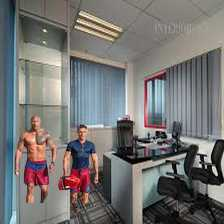

Mask shape :  (224, 224)


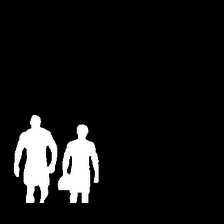

depth shape :  (224, 224)


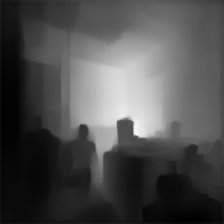

In [3]:
from os import listdir
from google.colab.patches import cv2_imshow
import cv2

path_FG_BG = 'Dataset/bg100/fg_100/overlay'
path_mask_FG_BG = 'Dataset/bg100/fg_100/mask'
path_depth_FG_BG = 'Dataset/bg100/fg_100/depth'
fg_bg_imageListDir = listdir(path_FG_BG)
mask_imageListDir = listdir(path_mask_FG_BG)
print("Number of FG_BG images : ",len(fg_bg_imageListDir))
print("Number of FG_BG masks : ", len(mask_imageListDir))
for image in fg_bg_imageListDir:
  print(image)
  bg_img = cv2.imread(path_FG_BG+'/'+image , cv2.IMREAD_UNCHANGED)
  mask_img = cv2.imread(path_mask_FG_BG+'/'+image , cv2.IMREAD_UNCHANGED)
  depth_img = cv2.imread(path_depth_FG_BG+'/'+image , cv2.IMREAD_UNCHANGED)
  #bg_img = cv2.resize(bg_img, (200,200), interpolation = cv2.INTER_AREA)
  print("Overlay shape : ",bg_img.shape)
  cv2_imshow(bg_img)
  print("Mask shape : ",mask_img.shape)
  cv2_imshow(mask_img)
  print("depth shape : ",depth_img.shape)
  cv2_imshow(depth_img)
  break

## MEAN And STD

In [0]:
import glob
from PIL import Image
import numpy as np
import csv
import time

def find_mean_std(labelInfo):
  with open( labelInfo, 'r') as labelData:
    labels = csv.reader(labelData, delimiter=';')
    # labels = list(labels)
    total = 400000
    mean_overlay = []
    sd_overlay=[]

    sd_mask=[]
    mean_mask = []

    sd_depth=[]
    mean_depth = []
    
    program_starts = time.time()
    for labelID,label in enumerate(labels):
      if labelID%40000 == 0:
        now = time.time()
        print("{}/{} done within {} seconds".format(labelID,total, (now - program_starts)))

      img_overlay = Image.open(label[1])
      img_mask    = Image.open(label[2])
      img_depth   = Image.open(label[3])

      imarr_overlay = np.array( img_overlay, dtype=np.float)
      imarr_mask    = np.array( img_mask, dtype=np.float)
      imarr_depth   = np.array( img_depth, dtype=np.float)

      mean_overlay.append(np.mean( imarr_overlay, axis=(0, 1)))
      sd_overlay.append(np.std( imarr_overlay, axis=(0, 1)))

      mean_mask.append(np.mean(imarr_mask))
      sd_mask.append(np.std(imarr_mask))

      mean_depth.append(np.mean(imarr_depth))
      sd_depth.append(np.std(imarr_depth))

    print("Number of Overlay Images = ", len(mean_overlay))
    print("Number of Mask Images    = ", len(mean_mask))
    print("Number of Depth Images   = ", len(mean_depth))
    print("Total Images             = ", len(mean_overlay) + len(mean_mask) + len(mean_depth))

    print("[OVERLAY] Mean = {}, STD= {}".format( np.mean(mean_overlay,  axis=0), np.std(sd_overlay,  axis=0) ))
    print("[MASK]    Mean = {}, STD= {}".format( np.mean(mean_mask), np.std(sd_mask) ))
    print("[DEPTH]   Mean = {}, STD= {}".format( np.mean(mean_depth), np.std(sd_depth) ))

In [7]:
find_mean_std('Dataset/label_data.csv')

0/400000 done within 3.62396240234375e-05 seconds
40000/400000 done within 236.324054479599 seconds
80000/400000 done within 474.63581371307373 seconds
120000/400000 done within 712.649736404419 seconds
160000/400000 done within 949.7409143447876 seconds
200000/400000 done within 1184.8664293289185 seconds
240000/400000 done within 1419.3192391395569 seconds
280000/400000 done within 1652.423011302948 seconds
320000/400000 done within 1886.184956073761 seconds
360000/400000 done within 2120.1245260238647 seconds
Number of Overlay Images =  400000
Number of Mask Images    =  400000
Number of Depth Images   =  400000
Total Images             =  1200000
[OVERLAY] Mean = [149.17579724 143.51813416 136.34473418], STD= [10.9817084  10.54722837  9.7497292 ]
[MASK]    Mean = 19.611268351153935, STD= 21.938615940996442
[DEPTH]   Mean = 103.79459450852995, STD= 7.628609954872591
